# Malaysian Islamic Equity Trend Prediction (MIETP)
## Data Mining (WQD7005)

## Authors
(1) Pavitra
(2) Shobana

## Milestone 1

### Introduction

Data source is from Bursa Malaysia website (https://www.bursamalaysia.com/market_information/shariah_compliant_equities_prices)

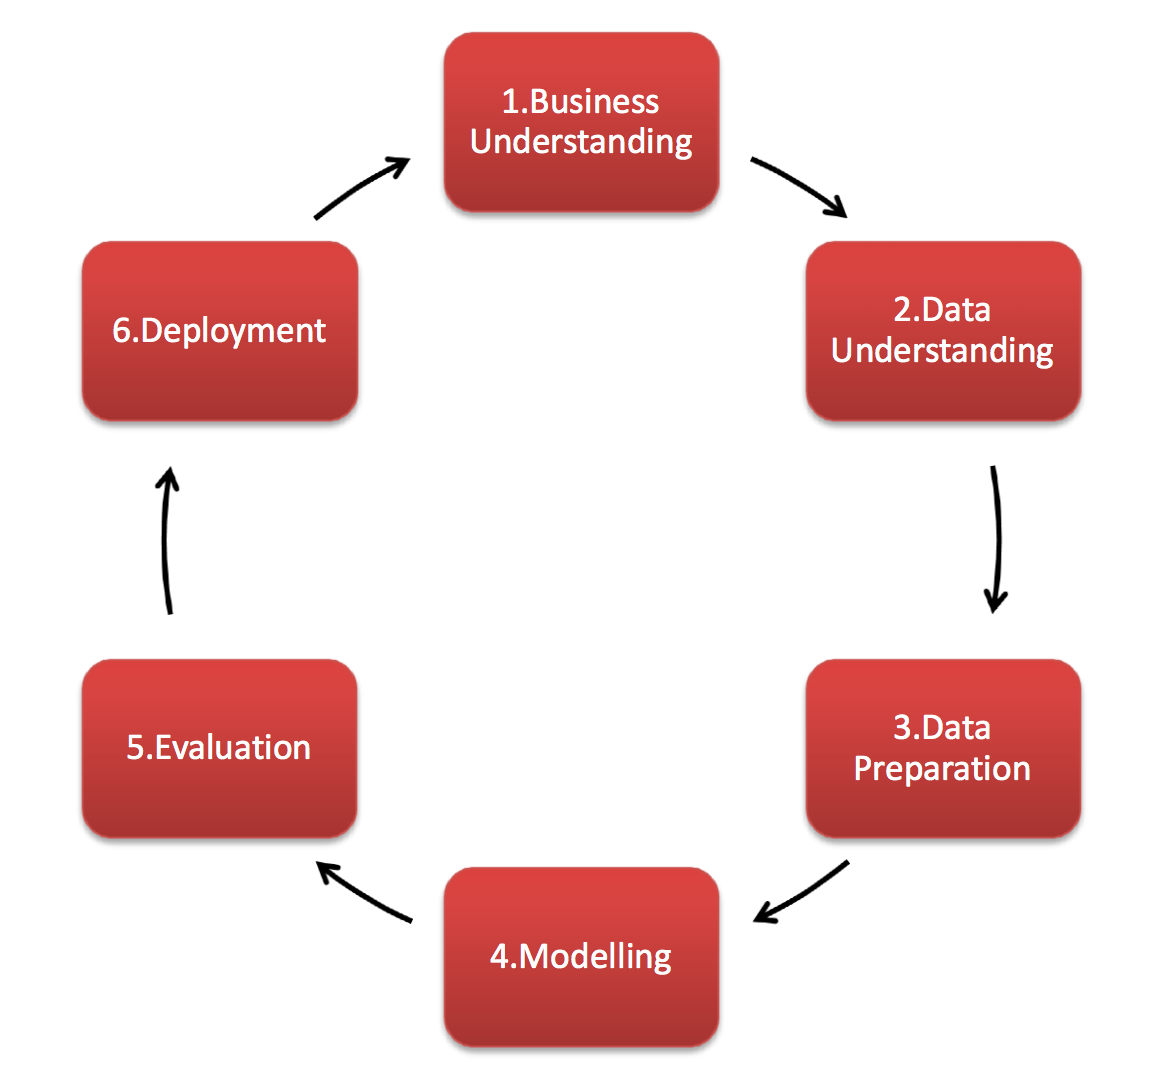

In [17]:
from IPython.display import Image 

Image('C:\\Users\\ada\\OneDrive\\Masters\\WQD7005_2.0\\Assignement\\crisp.png', width="700", height = "300")



In [1]:
#LIBRARIES
import requests
import urllib.request
import time
import pandas as pd
# import boto3
from bs4 import BeautifulSoup


In [ ]:

#PREPARE DF
shariah = pd.DataFrame()

#LOOP FETCH URL
for i in range(1, 20):
    url = 'https://www.bursamalaysia.com/market_information/shariah_compliant_equities_prices?per_page=50&page='+str(i)
    response = requests.get(url)
    
#BS ELEMENT
    soup = BeautifulSoup(response.text, "html.parser")
    data = []
    table = soup.find('table', attrs={'class':'table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table'})
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    print(table)

    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    
#APPEND DF
    df = pd.DataFrame(data)
    df2 = df.iloc[:, :-1]
    shariah = shariah.append(df2, ignore_index = True)

#RENAME COLUMNS
    shariah_table = shariah.rename(columns = {0: "NO", 1: "NAME", 2: "CODE", 3: "REM", 4: "LAST_DONE", 5: "LACP", 6: "CHG", 7: "%CHG", 8: "VOL('00)", 9: "BUY_VOL('00)", 10: "BUY", 11: "SELL", 12: "SEL_VOL('00)", 13: "HIGH", 14: "LOW"})
    current_date = time.strftime("%Y%m%d")
    shariah_table["Date"] =current_date
#SAVING FILE
#     shariah_table.to_csv(current_date + "_shariah_fulldump.csv")

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

<table class="table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table" data-entries-count="926" style="width: 100%;">
<thead class="upper font-xxsmall">
<tr class="">
<th data-sort="" scope="col">No</th>
<th class="tooltip-js" data-sort="short_name" scope="col" title="Stock Short Name">Name</th>
<th class="tooltip-js" data-sort="stock_id" scope="col" title="Stock Code">Code</th>
<!-- data-toggle="tooltip" data-placement="top" title="Tooltip on top" -->
<th class="tooltip-js" data-sort="remarks" scope="col" title="Remark. E.g. Short Selling available / Suspended">REM</th>
<th class="tooltip-js" data-sort="last_done_price" scope="col" title="Current Last Traded Price">Last Done</th>
<th class="tooltip-js" data-sort="previous" scope="col" title="Last Adjusted Closing Price">LACP</th>
<th class="tooltip-js" data-sort="change" scope="col" title="Current Price Change">CHG</th>
<th class="tooltip-js" data-sort="percent_change" scope="col" title=

In [4]:
print(shariah_table)

      NO            NAME    CODE    REM LAST_DONE    LACP     CHG     %CHG  \
0      1       TRIVE [S]    0118      s     0.005   0.010  -0.005   -50.00   
1      2      SAPNRG [S]    5218      s     0.095   0.110  -0.015   -13.64   
2      3          VC [S]    0060  0.030     0.055  -0.025  -45.45  961,346   
3      4     VELESTO [S]    5243      s     0.155   0.170  -0.015    -8.82   
4      5        JAKS [S]    4723      s     0.745   0.870  -0.125   -14.37   
..   ...             ...     ...    ...       ...     ...     ...      ...   
921  922  WEGMANS-WA [S]  0197WA      s         -   0.065       -        -   
922  923     WOODLAN [S]    7025      s         -   0.490       -        -   
923  924     WTHORSE [S]    5009      s         -   0.890       -        -   
924  925     XIANLNG [S]    7121      s         -   0.510       -        -   
925  926  YONGTAI-WA [S]  7066WA      s         -   0.005       -        -   

      VOL('00) BUY_VOL('00)    BUY   SELL SEL_VOL('00)   HIGH  

In [8]:
######################################################################  
#                            LIBRARIES                               #
###################################################################### 

import json
import requests
import time
import pandas as pd
import boto3
from bs4 import BeautifulSoup
bucket_name = "meitp-bucket-input"
#bucket_path = "https://s3.console.aws.amazon.com/s3/buckets/meitp-bucket/"
s3 = boto3.client('s3')

######################################################################  
#                            GLOBAL VARIABLE                         #
###################################################################### 

#PREPARE DF
shariah = pd.DataFrame()

#LOOP FETCH URL
for i in range(1, 20):
   
    url = 'https://www.bursamalaysia.com/market_information/shariah_compliant_equities_prices?per_page=50&page='+str(i)
    response = requests.get(url)
    print(i)
   
#BS ELEMENT
    soup = BeautifulSoup(response.text, "html.parser")
    data = []
    table = soup.find('table', attrs={'class':'table datatable-striped text-center equity_prices_table datatable-with-sneak-peek js-anchor-price-table'})
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
  
    for row in rows:
        cols = row.find_all('td')
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    
#APPEND DF
    df = pd.DataFrame(data)
    df2 = df.iloc[:, :-1]
    shariah = shariah.append(df2, ignore_index = True)

#RENAME COLUMNS
    shariah_table = shariah.rename(columns = {0: "NO", 1: "NAME", 2: "CODE", 3: "REM", 4: "LAST_DONE", 5: "LACP", 6: "CHG", 7: "%CHG", 8: "VOL('00)", 9: "BUY_VOL('00)", 10: "BUY", 11: "SELL", 12: "SEL_VOL('00)", 13: "HIGH", 14: "LOW"})
    current_date = time.strftime("%Y%m%d")
    shariah_table["Date"] =current_date
    
#SAVING FILE
filename = current_date + "_fulldump.csv"
filedata = shariah_table.to_csv('/tmp/'+filename)
filedataforS3 = shariah_table.to_csv()
print('File is saved with name:', filename)

###################################################################### 
#                                 S3                                 #
######################################################################

s3.put_object(ACL='private', Bucket=bucket_name, Key=filename, Body= filedataforS3 )
print ('File uploaded to s3.')

###################################################################### 
#                         LAMBDA FUNCTION                            #
######################################################################

def lambda_handler(event, context):

    return {
        'statusCode': 200,
        'body': json.dumps('Hello from Lambda!')
    }

###################################################################### 
